In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [55]:
df = pd.read_csv(r'C:\Users\User\Downloads\airline-passengers.csv')

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dx['Month'] = pd.to_datetime(dx['Month'], format='%Y-%Ww')

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
ts = df.set_index(['Month'])

In [9]:
ts.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


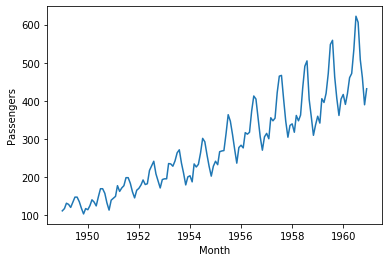

In [10]:
sns.lineplot(x= df['Month'] , y = df['Passengers'],data=ts)

In [11]:
ts.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


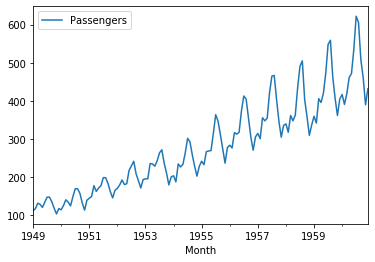

In [12]:
ts.plot()

In [32]:
#Testing for stationarity
from statsmodels.tsa.stattools import adfuller

test_results = adfuller(ts['Passengers'])

test_results


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(ts['Passengers'])

ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [34]:
print("Null Hypothesis Accepted")


Null Hypothesis Accepted


In [35]:
print("Null Hypothesis Accepted")

print('Since the data is non stationary, we can do differencing')

Null Hypothesis Accepted
Since the data is non stationary, we can do differencing


In [37]:

ts['Passengers First Difference'] = ts['Passengers'] - ts['Passengers'].shift(1)
ts['Passengers Seasonal Difference'] = ts['Passengers'] - ts['Passengers'].shift(12) # Since the season is for 1 year

ts.head(16)


,Passengers,Passengers First Difference,Passengers Seasonal Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


ADF Test Statistic : -3.3830207264924805
p-value : 0.011551493085514982
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Data has now become stationary
If the p value is exactly 0, then teh value will become exactly stationary. Since the p value is 0.5, we can observe a bit of ups and downs


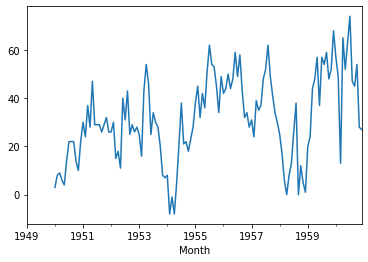

In [39]:
#Using ADF if the data is stationary
adfuller_test(ts['Passengers Seasonal Difference'].dropna())

print('Data has now become stationary')

ts['Passengers Seasonal Difference'].plot()

print('If the p value is exactly 0, then teh value will become exactly stationary. Since the p value is 0.5, we can observe a bit of ups and downs')


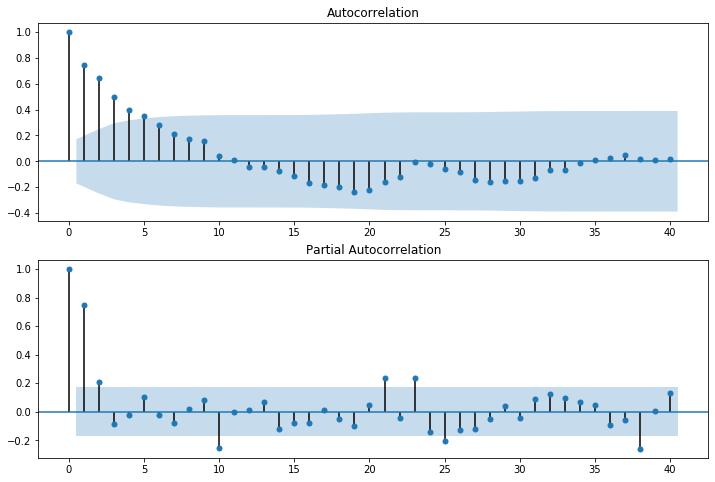

In [40]:
#Autocorrelation
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts['Passengers Seasonal Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts['Passengers Seasonal Difference'].iloc[13:],lags=40,ax=ax2)


In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [46]:

from statsmodels.tsa.arima_model import ARIMA

model=sm.tsa.statespace.SARIMAX(ts['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


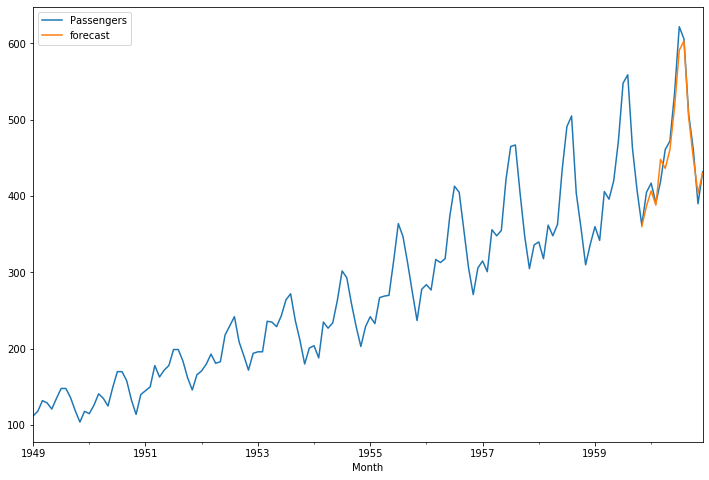

In [62]:
ts['forecast']=results.predict(start=130,end=144,dynamic=True)
ts[['Passengers','forecast']].plot(figsize=(12,8))

In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[ts.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [66]:
future_datest_ts_data=pd.DataFrame(index=future_dates[1:],columns=ts.columns)

In [67]:
future_datest_ts_data.tail()

,Passengers,Passengers First Difference,Passengers Seasonal Difference,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [68]:
future_data=pd.concat([ts,future_datest_ts_data])

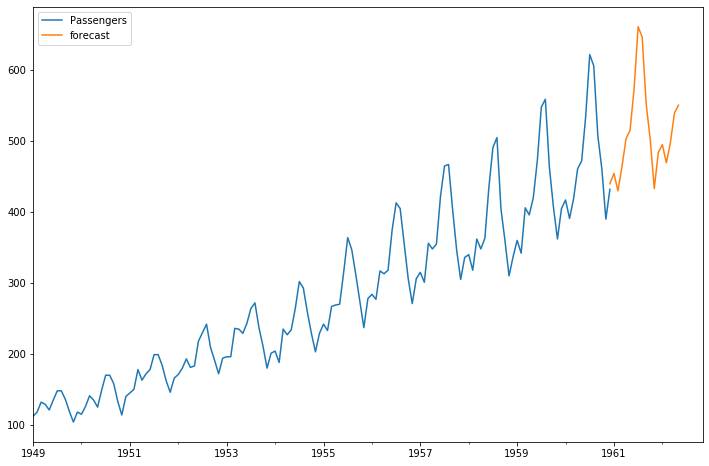

In [73]:
future_data['forecast'] = results.predict(start = 143, end = 160, dynamic= True)  
future_data[['Passengers', 'forecast']].plot(figsize=(12, 8))

In [77]:
future_data['forecast']

1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1962-07-01   NaN
1962-08-01   NaN
1962-09-01   NaN
1962-10-01   NaN
1962-11-01   NaN
Name: forecast, Length: 167, dtype: float64